In [28]:
import wget
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import mapclassify
from functions import empty_directory, make_directorytree_if_not_exists

print('hello')


hello


## Inital Map

<AxesSubplot:>

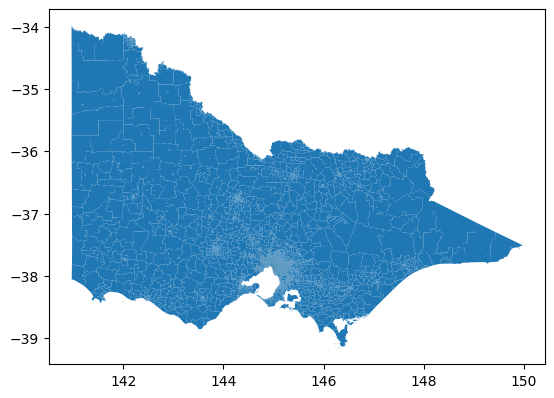

In [14]:
sa1file='spatial/sa1_2016_vic.shp'

sa1 = gpd.read_file(sa1file)
sa1['SA1_7DIG16'] = sa1['SA1_7DIG16'].astype("Int64")

sa1.plot()

## Load Primary Vote Data

In [15]:
primaryfile = 'output/f2022_fp_by_sa1_2016_aus.csv'

primary = pd.read_csv(primaryfile)
primary['sa1_2016'] = primary['sa1_2016'].astype("Int64")

print(primary)

       sa1_2016  AJP     ALP     ASP  AUC     AUD  AUP  AUVA  CEC  CLP  ...  \
0       1059999  0.0  0.4803  0.0000  0.0  0.0000  0.0   0.0  0.0  0.0  ...   
1       1099999  0.0  0.2708  0.0000  0.0  0.0000  0.0   0.0  0.0  0.0  ...   
2       1100701  0.0  0.1887  0.0431  0.0  0.0000  0.0   0.0  0.0  0.0  ...   
3       1100702  0.0  0.4308  0.0000  0.0  0.0064  0.0   0.0  0.0  0.0  ...   
4       1100703  0.0  0.4367  0.0000  0.0  0.0062  0.0   0.0  0.0  0.0  ...   
...         ...  ...     ...     ...  ...     ...  ...   ...  ...  ...  ...   
56297   9100402  0.0  0.2512  0.0000  0.0  0.0000  0.0   0.0  0.0  0.0  ...   
56298   9100403  0.0  0.2460  0.0000  0.0  0.0000  0.0   0.0  0.0  0.0  ...   
56299   9100404  0.0  0.2506  0.0000  0.0  0.0000  0.0   0.0  0.0  0.0  ...   
56300   9100405  0.0  0.2930  0.0000  0.0  0.0000  0.0   0.0  0.0  0.0  ...   
56301   9100407  0.0  0.2545  0.0000  0.0  0.0000  0.0   0.0  0.0  0.0  ...   

       REAS  SAL  SOPA     SPP  TLOC  TNL    UAPP  

## Merge primary data onto sa1 file

<AxesSubplot:>

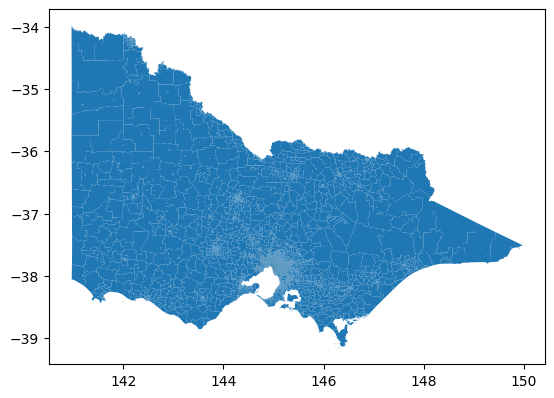

In [23]:
mapdata = sa1.merge(primary, how='left', left_on='SA1_7DIG16' ,right_on='sa1_2016')
# todo - all columns but geom
mapdata[['GRN', 'ALP']] = mapdata[['GRN', 'ALP']].fillna(value=0)
mapdata.plot()

## Choropleth

<AxesSubplot:>

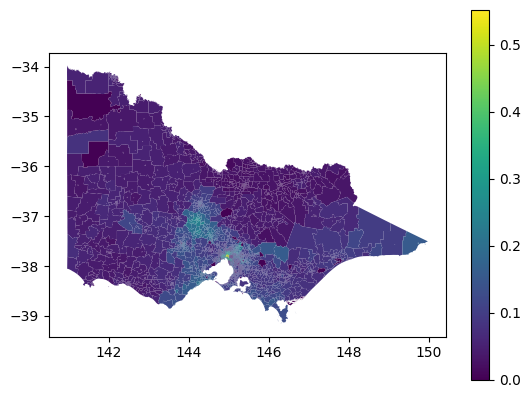

In [24]:

fig, ax = plt.subplots(1, 1)
mapdata.plot(column='GRN', ax=ax, legend=True)

## Chloropleth 

In [30]:
from statistics import quantiles


mapdata.plot(column='GRN', cmap='Greens', scheme='quantiles');


TypeError: 'int' object is not iterable

working through https://geopandas.org/en/stable/docs/user_guide/mapping.html
todo better handle missing scheme